In [2]:
from product import Product
from bs4 import BeautifulSoup
import pandas as pd


# Grab an item to test parsing
product = Product().get_item(product_id = 20673)
print(product)

print("Using product with ID# %d\n" % product['id'])

# Return the unparsed html text
spec = product['specification']
print(spec)

# Remove HTML and parse text to be more readable
print('\nParsed HTML\n')
soup = BeautifulSoup(spec, 'html.parser')

word_count = 0
for string in soup.stripped_strings:
    print(string)
    word_count += len(string.split())
    
print(word_count)
print('\nAs list of strings\n')
print([text for text in soup.stripped_strings])

{'id': 20673, 'full_name': 'SCISHION V88 Android TV Box  - RK3229 CPU, 4K, Android 5.1,  KODI,  WIFI,  3D Movie Support, 4 X USB, SD Card Slot', 'short_name': 'V88 Android TV Box', 'overview': "<strong>Key Features...<br /><br /></strong><ul id='power_specs'><li>Powerful Rockchip RK3299 Quad Core CPU and Mali GPU for a performance you can rely on</li><li>Kodi 16.1 Media player brings entertainment for all the family</li><li>User friendly Android 5.1 operating system is quick and easy to navigate</li><li>Great connectivity with Wi-FI, 4 USB ports, SPDIF, AV and SD card support</li></ul><br /><h2>Kodi TV Box</h2><br />With its Rockchip RK3229 CPU the V88 TV Box brings a solid performance and the Cortex-A7 processor teamed with a Mali-400MP CPU you get a richer viewing experience that supports 4K resolutions. The 3840 by 2160 pixel output of this TV box is equivalent to two 1080P screens so you're ready for the 4K revolution. With a 4K TV you can enjoy this amazing detail making you feel 

In [11]:
from IPython.display import display

data_pd = pd.DataFrame(data= [product], columns = ['full_name'])

display(data_pd)

,full_name
0,"SCISHION V88 Android TV Box - RK3229 CPU, 4K,..."


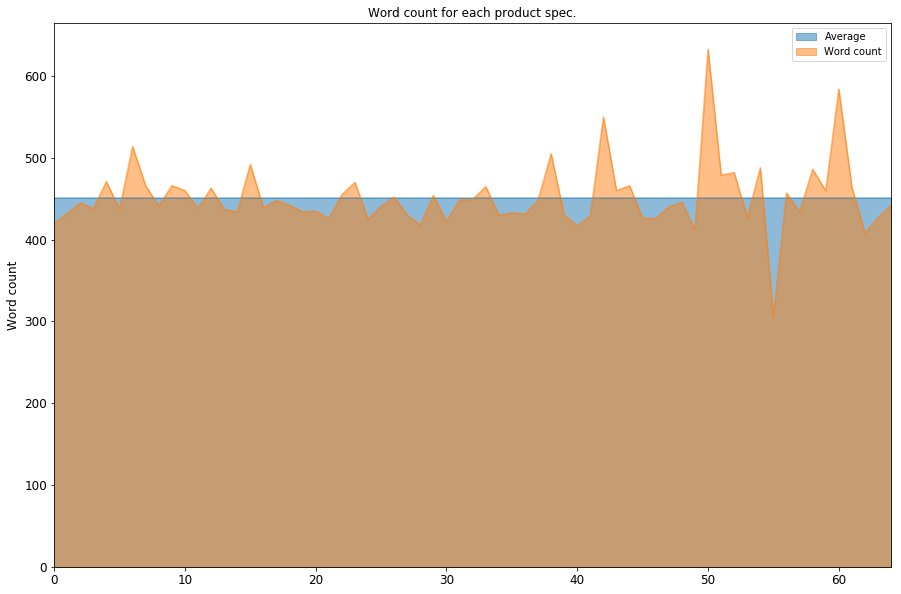

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def get_word_count(spec):
    # Parse the HTML
    soup = BeautifulSoup(spec, 'html.parser')
    
    word_count = 0
    
    # Strip all tags and white spaces and 
    # count the words in each string.
    for string in soup.stripped_strings:
        word_count += len(string.split())
    
    return word_count
            
product_spec_word_counts = []
for product in Product().get_all():
    product_spec_word_counts.append(get_word_count(product['specification']))

data = {'Average': np.average(product_spec_word_counts), 'Word counts': product_spec_word_counts}
# df = pd.DataFrame(data = data)
# ax = df.plot(kind='bar', title ="Word count for each product spec.", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_ylabel("Word count", fontsize=12)


df = pd.DataFrame(data = {'Word count': product_spec_word_counts, 'Average': np.average(product_spec_word_counts)})
ax = df.plot.area(stacked=False, title ="Word count for each product spec.", figsize=(15, 10), legend=True, fontsize=12);
ax.set_ylabel("Word count", fontsize=12)

plt.show()

In [1]:
import json
import re
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from bs4 import BeautifulSoup
from pprint import pprint
from product import Product

pro = Product()
product = pro.get_item(product_id = 20673)
print(product['short_name'])

# def getProducts():
#     with open('products.json') as data_file:    
#         data = json.load(data_file)
    
#     products = []
#     for product in data:
#         products.append({
#             'id': product['product_id'],
#             'full_name': product['full_product_name'],
#             'short_name': product['short_product_name'],
#             'overview': product['overview'],
#             'specification': product['specification'],
#             'meta_keyword': product['meta_keyword'],
#             'meta_description': product['meta_description'],
#             'price': product['retail_price'],
#             'related': product['related_products']
            
#         })
        
#     return products 
#     return pd.DataFrame(products)
    

# def train(key):
#     start = time.time()
#     tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english') 
#     tfidf_matrix = tf.fit_transform(getProducts()[key])
#     cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

#     sim = []
#     for idx, row in df.iterrows():
#         similar_indices = cosine_similarities[idx].argsort()[:-5:-1]
#         similar_items = [(cosine_similarities[idx][i], getProducts()['id'][i]) for i in similar_indices]

#         sim.append({
#             similar_items[0][1]: similar_items[1:]
#         })

#     print("Engine trained in %s seconds." % (time.time() - start))

#     return sim

# start = time.time()
# print("Training data ingested in %s seconds.\n" % (time.time() - start))

# # pprint( train('specification') )

# print("Product ID#: %s" % (product.get_all()[0]['id']))
# soup = BeautifulSoup(product.get_all()[0]['specification'], 'html.parser')
# # print(soup.prettify())
# for string in soup.strings:
#     print(string)

# print("\nOverview:")
# over = BeautifulSoup(product.get_all()[0]['overview'], 'html.parser')
# # print([text for text in over.stripped_strings])
# for string in over.stripped_strings:
#     print(string)


# gen = soup.find(id="general")
# print("\nGeneral:")
# gen = soup.select('ul#general')[0]
# for child in gen.children:
#     print(child.text)

# print("\nPORTS:")
# gen = soup.select('ul#Ports')[0]
# for child in gen.children:
#     print(child.text)
# print("\n")
# print(gen)
# print(soup.get_text())

# print(getProducts()['id'='20673'])
# print(soup.prettify())

V88 Android TV Box


In [122]:
# 20673 -> 21504 matches well at 0.93284674602115525
# 19830

pprint(train(df, 'meta_keyword'))

Engine trained in 0.013047218322753906 seconds.
[{20673: (0.88089811068634505,
          20781,
          0.84765995748924172,
          20924,
          0.77312237219162616,
          20656)},
 {21092: (0.59433839441853675,
          21099,
          0.54560654891975213,
          20581,
          0.54469517976417758,
          21502)},
 {20965: (0.50881331959938936,
          21099,
          0.48581225613327655,
          20581,
          0.48088518368222866,
          21196)},
 {21552: (0.73726945505371122,
          21504,
          0.64107197762919099,
          21298,
          0.64107197762919099,
          21299)},
 {20891: (0.48524459715784141,
          21495,
          0.47134174989372202,
          21297,
          0.44489381236726189,
          21006)},
 {21553: (0.47208986464410374,
          21003,
          0.40788018559437772,
          20729,
          0.38570462824086915,
          21099)},
 {20347: (0.47952585660864244,
          21099,
          0.4578487419643533

In [123]:
pprint(train(df, 'overview'))

Engine trained in 0.09091663360595703 seconds.
[{20673: (0.16622083379762526,
          20965,
          0.14777235430564237,
          20346,
          0.13974570066089928,
          20826)},
 {21092: (0.18916547865167588,
          20924,
          0.14266773625602092,
          21099,
          0.13944164749761698,
          21197)},
 {20965: (0.19463555215662412,
          20826,
          0.16622083379762526,
          20673,
          0.14713146662700352,
          20964)},
 {21552: (0.2509011176977482,
          21471,
          0.23355457602545962,
          21299,
          0.22786456219924237,
          21297)},
 {20891: (0.24995962466419533,
          20825,
          0.23559428320584333,
          21006,
          0.21480072217249391,
          21302)},
 {21553: (0.1549719392995656,
          20094,
          0.15149681626553063,
          20093,
          0.12109412365647024,
          15797)},
 {20347: (0.12145932562935463,
          20242,
          0.1191172801743835,
 